# Tarea 9
>Carlos Oliveri 

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [55]:
class Vertice:
  def __init__(self,x):
    self.clave = x
    self.vecinos = []
    self.dist = 0
    self.color = 'blanco'
    self.padre = None

class Grafos:
  def __init__(self):
    self.vertices = []
    self.s = None

  def agregarVertice(self,n):
    self.vertices.append(n)

  def agregarAristas(self,a,b,c):
    a.vecinos.append((b,c))
    #b.vecinos.append((a,c,0))

  #Esta funcion busca un Vertice a partir de su Clave
  def buscarNodo(self,ciudad):
    for j in self.vertices:
      if j.clave == ciudad:
        return j #Devuelve el objeto si lo encuentra
    return False #Si no lo encuentra devuelve False

  ''' def mostrarGrafos(self):
    G = nx.Graph()
    for u in self.vertices:
      for v in u.vecinos:
        G.add_edge(u.clave,v[0].clave)
    nx.draw_circular(G,with_labels = True)
    plt.show() '''

  def mostrarGrafo(self):
    G = nx.DiGraph()
    for u in self.vertices:
      G.add_node(u.clave) #para mostrar vértices sin aristas incidentes o de salida
    for u in self.vertices:
      for v in u.vecinos:
        G.add_edge(u.clave,v[0].clave,weight=v[1])
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,pos,node_size=700)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    for a in pos:
      u = self.buscarNodo(a)
      x,y=pos[a]
      plt.text(x,y+0.2,s=str(u.dist), bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
    plt.axis('off')
    plt.show()

  def mayorDist(self,s):
    global maxDist, objet
    for u in self.vertices:
      u.padre = None
      u.color = 'blanco'
      u.dist = 0
    maxDist = 0
    s.color = 'gris'
    fila = Cola()
    fila.agregar(s)
    while not fila.vacia():
      u = fila.quitar()
      for v in u.vecinos:
        if v[0].color == 'blanco':
          v[0].color = 'gris'
          v[0].padre = u
          v[0].dist = u.dist + v[1]
          if maxDist < v[0].dist:
            maxDist = v[0].dist
            objet = v[0]
          fila.agregar(v[0])
      u.color = 'negro'
    return maxDist,objet

  # Devuelve el vecino mas cercano al vertice enviado,
  #utilizado para generar el MST
  def menorDistVecino(self,u):
    minDist = 1000
    objet = None
    for v in u.vecinos:
      if v[0].color == 'blanco':
        if minDist > v[1]:
          minDist = v[1]
          objet = v
    return objet

  def createMst(self):
    for v in self.vertices:
      v.padre = None
      v.color = 'blanco'
      v.dist = 0
    mst = []
    u = self.vertices[0]
    u.color = 'gris'
    mst.append((None,u,0))
    while len(mst) < len(self.vertices):
      objet = (None,None,1000)
      for v in mst:
        vecinoMenorDistancia = self.menorDistVecino(v[1])
        #print(v[1].clave,vecinoMenorDistancia[0].clave,vecinoMenorDistancia[1])
        try:
          if vecinoMenorDistancia[1] < objet[2]:
            objet = (v[1],vecinoMenorDistancia[0],vecinoMenorDistancia[1])
        except:
          pass
      objet[1].color = 'gris'
      objet[1].padre = objet[0]
      mst.append(objet)
    return mst

class Cola:
  def __init__(self):
    self.elementos = []
  def quitar(self):
    if len(self.elementos) == 0:
      print("Cola vacia!!!")
      return None
    return self.elementos.pop(0)
  def agregar(self,elementoNuevo):
    self.elementos.append(elementoNuevo)
  def vacia(self):
    if len(self.elementos) == 0:
      return True

def inicializar_Dist_Grafo(G):
    pesoMax = 10000000000
    n = len(G.vertices)
    for v in G.vertices:
        v.dist = n*pesoMax
        v.padre = None
    G.s.dist = 0

def relajar(u,v,p):
    if v.dist > u.dist + p:
        v.dist = u.dist + p
        v.padre = u

def BellmanFord(G):
    inicializar_Dist_Grafo(G)
    n = len(G.vertices)
    #for i in range(n-1):
    for u in G.vertices:
      for v in u.vecinos:
        relajar(u,v[0],v[1])
    for u in G.vertices:
      for v in u.vecinos:
        if v[0].dist > u.dist + v[1]:
          return False
    return True

ingrese los vertices del grafo
s t x y
Indique cual vertice es el vertice 's'
s
ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:
s t 6
ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:
t x -2
ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:
y x 7
ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:
y s 2
ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:
-1


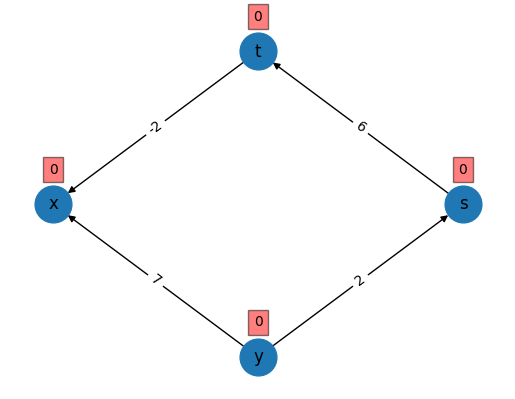

In [56]:
g1 = Grafos() #Creamos un Grafo Vacio
print("ingrese los vertices del grafo")
entrada = input()
entrada = entrada.strip()
entrada = entrada.split()
for k in entrada:
  g1.agregarVertice( Vertice(k) )
n = 0
print("Indique cual vertice es el vertice 's'")
entrada = input()
entrada = entrada.strip()
g1.s = g1.buscarNodo(entrada)

while n == 0:
  print("ingrese las relaciones entre los vertices y su direccion el orden de los vertices determina la direccion:")
  entrada = input()
  entrada = entrada.strip()
  entrada = entrada.split()
  if entrada[0] == '-1':
    n = 1
  else:
    # validacion de formato de entrada / no esta del todo bien validado
    while len(entrada) != 3:
      print('Entrada invalida vuelva a intentar: "1 2 3"')
      entrada = input()
      entrada = entrada.strip()
      entrada = entrada.split()
    g1.agregarAristas(g1.buscarNodo(entrada[0]),g1.buscarNodo(entrada[1]),int(entrada[2]))
g1.mostrarGrafo()

In [57]:
BellmanFord(g1)
bandera = 0
for v in g1.vertices:
  if v.dist >= 1000000000:
    bandera = 1
    print("Se encontro un nodo inalcanzable: ")
    print(v.clave)
    break
print("Busqueda terminada")


Se encontro un nodo inalcanzable: 
y
Busqueda terminada
